# Are Stock Markets Self Organising Criticalities?



## Aim
This simulation will demonstrate the stock market's near self-organising state as traders are run as agents throughout a specified period of time. This project is a multi-agent based system simulating a single stock market. It was built to investigate the dynamics of stock markets, attempting to draw an analogy between it and the Abelian (Bak-Tang-Wiesenfeld) sandpile simulation using evidence of power-law behaviour, to study self-organising criticality and non-Gaussian statistics.  Both simulations are used to build up intuition about the behaviour of complex systems, which are systems that have many components and a lot of energy flow between them. The modified Abelian sandpile simulation can be found [here](https://github.com/NajlaAlariefy/BTW-Sandpile). For details see report.


## Stock Market Simulation
### Simulation Parameters 

> ** stock_options ** How many stock options in the system.  
> ** traders ** How many trader agents in the simulation.   
> ** duration ** How many times steps should the simulation run.

Other parameters that you can play with in the code:
> stock.risk  
> stock.perceived_values  
> stock.prices  
> trader.risk_appetite  (also referenced as risk_tolerence)  
> trader.wallets  


###  Simulation Output  

> ** index ** A list of market indices throughout the simulation  
> ** traders ** A list of Trader objects containing [id, risk_appetite, wallet, portfolio]  
> ** stocks ** A list of Stock objects containing [id, risk, perceived_value, price, outstanding_shares]  
> ** market ** 2D array of market displaying traders [their total assets, wallets and portfolios] and stock prices and perceived values

### Trader Assessment of Stock
Stock prices are governed by trader perception of its fluctuating value. This outlines the current flow of decision.

![Stock Assessment by Trader](figs/flowchart.svg)

## Running the Simulation

In [123]:
### RUN SIMULATION ###
import warnings
warnings.filterwarnings('ignore')
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from stock_market import run_market
import random


### CHANGE PARAMETERS HERE ###
stock_options = 50
traders = 100
duration = 100000

# optional seed 
random.seed(1)
index, traders, stocks, market = run_market(stock_options, traders, duration)


Market simulation done.  100000  time steps,  50  stock options,  100  traders.


## Exploring the Stock Market

In [217]:
import warnings
warnings.filterwarnings('ignore')
from util import plot_wealth_distribution, plot_index, plot_portfolios, plot_wealth_risk, plot_stocks, plot_index_powerlaw
%reload_ext autoreload
%autoreload 2

### Market Index

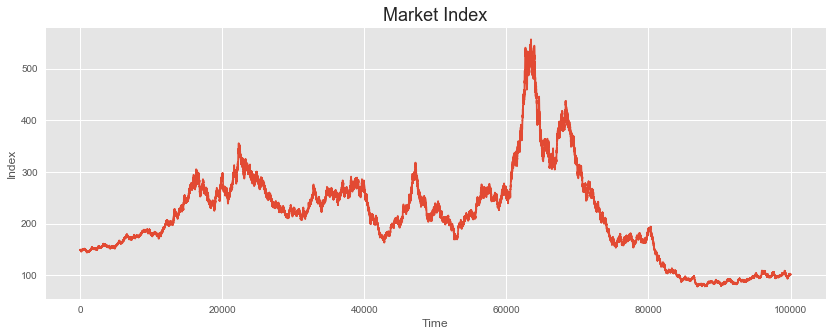

In [216]:
plot_index(index)

### Trader Wealth Distribution

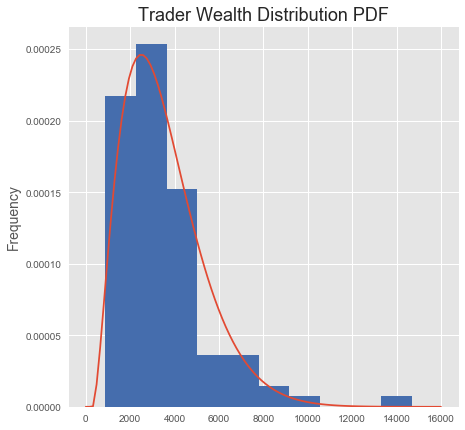

In [204]:
%reload_ext autoreload
%autoreload 2
plot_wealth_distribution(market)

### Trader Portfolios

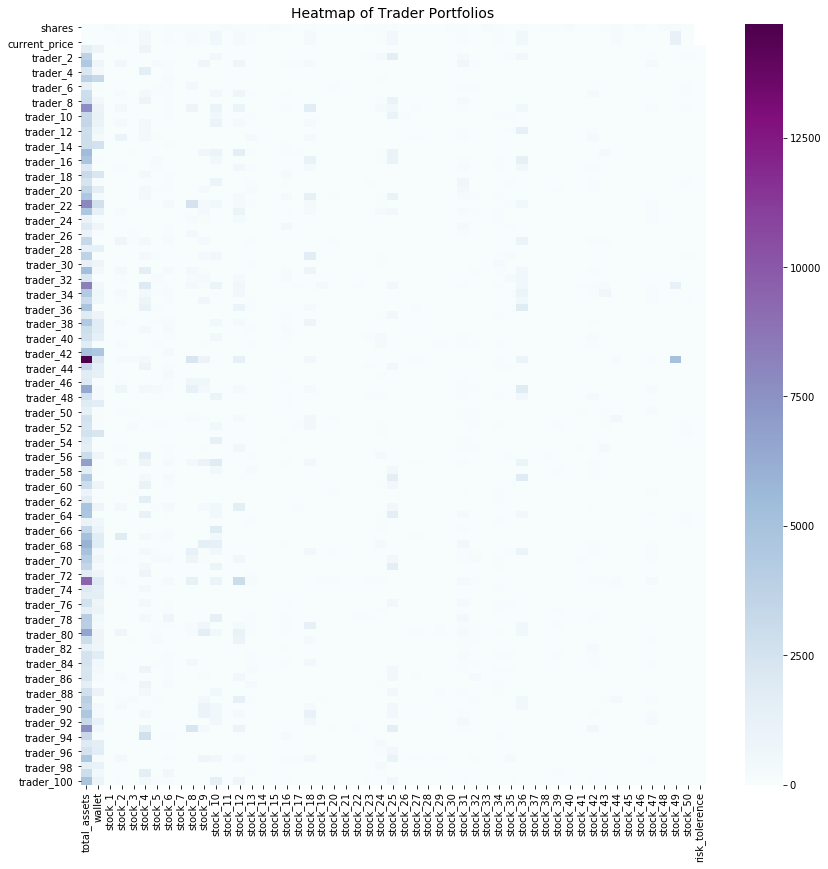

In [155]:
plot_portfolios(market)

### Plotting Stock Option Value/Price Trends

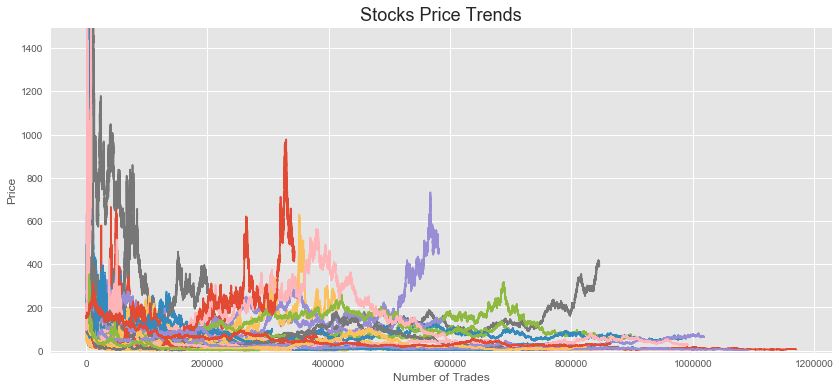

In [214]:
%reload_ext autoreload
%autoreload 2
plot_stocks(stocks)

## Market Index Power Law Alpha

In [176]:
import powerlaw
pl = powerlaw.Fit(index)
print(pl.alpha)

Calculating best minimal value for power law fit


6.16410984555


The power law exponent is 1 + a = 6.164


### Plotting Power-Law on Market Index

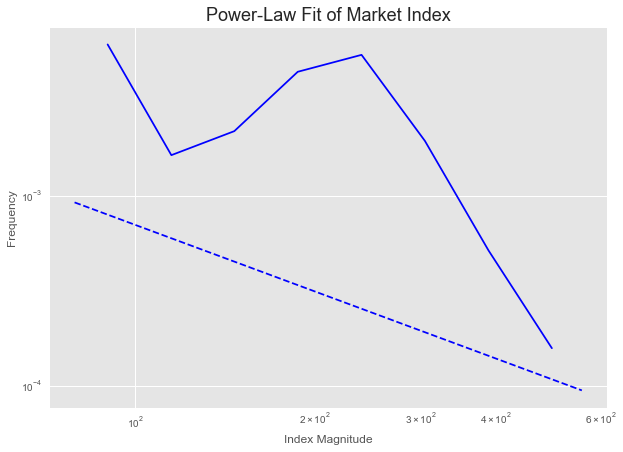

In [218]:
plot_index_powerlaw(index)

### Do market fluctuations follow Power Law behaviour?
From the plot above, it seems as though the market's perfomance does not demonstrate power law behaviour.

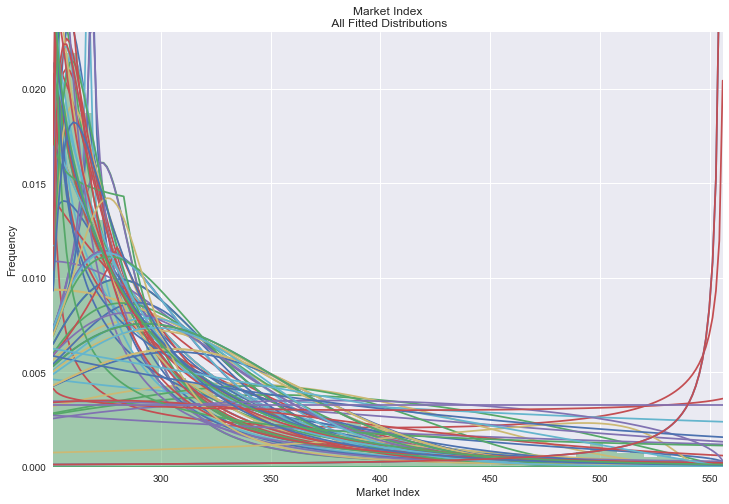

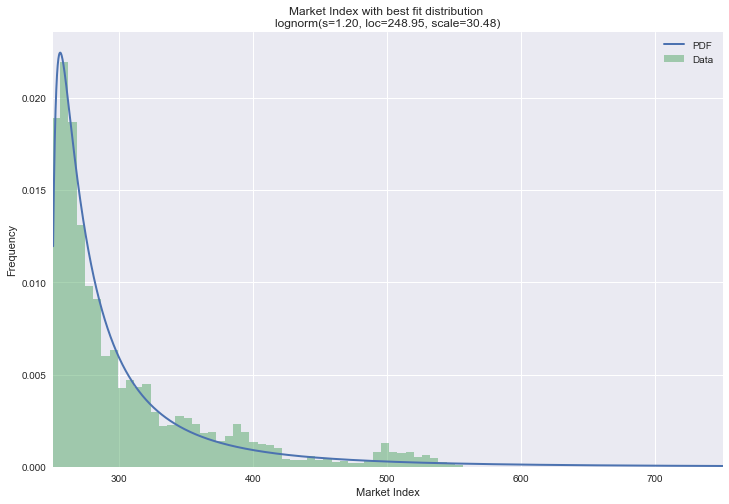

In [197]:
from distributions import plot_distribution
import pandas as pd

filtered_index = list(filter(lambda x: x > 250, index))
data = pd.Series(filtered_index)

plot_distribution(data, 'Market Index')


### Wealth vs Risk Tolerence — Normalised Values

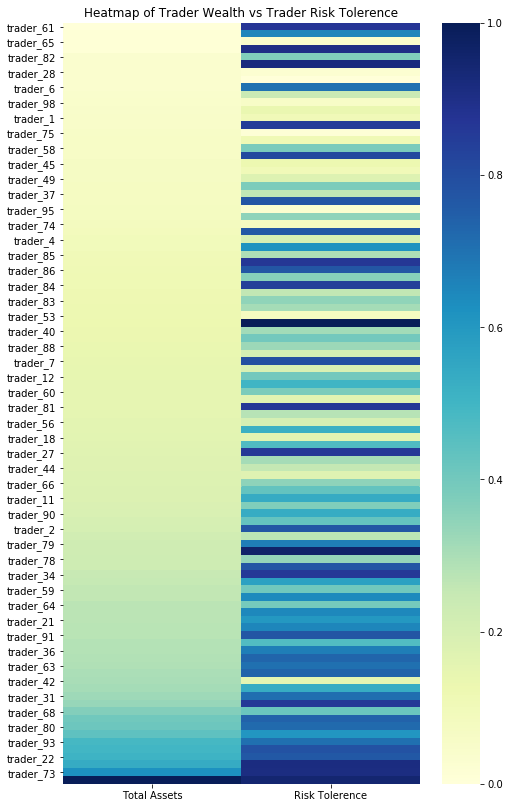

In [149]:
%reload_ext autoreload
%autoreload 2
plot_wealth_risk(market, traders)

### Is there a correlation between Wealth and Risk Tolerence in Traders?

In [194]:
import numpy
numpy.corrcoef(market.iloc[3:,0], market.iloc[3:,52])[0, 1]

0.43099211830620143